In [6]:
print("ASSIGNMENT 2 -Spiritualist Newspaper")
print("Xin Jin")


ASSIGNMENT 2 -Spiritualist Newspaper
Xin Jin


In [7]:
txt1="""
Describe:

The general type of the data consisting of 1 plain text readme file, 1 CSV inventory file, 416 plain text files, 6365 ALTO XML files, 
416 METS files, 6365 image files is textual. The total size of all text files which are original OCRed but not cleaned up is 66.6MB, 
and the time span of these files is from November 19th 1869 when the newspaper started to be pubulished to May 1882. This dataset 
contains complete volumes of ‘The Spiritualist’, later‘The Spiritualist Newspaper’, and a part of its successor ‘Psyche’.As for 
the structure of this newspaper,the layout changed with 3 different versions. In general, per edition of newspaper consists of 
passages several topics and some no topic passages.

There is a tight correlation between challenges gaven by dataholder with the dataset. For instance, how was Spiritualism presented in 
these newspapers: what topics and themes recur and do these change over time. Since the layouts of all newspaper are similar, we can 
easily find that some topics repeat a lot of times during a period, which means there must be some changes of topics during the time. 

For the question that is it possible to explore how is the afterlife presented, and is it presented differently for different types 
of people: gender, age, social class etc, professions. Actually, it is a knotty but also interesting problem. Almost every passages 
are relevant to this question, and what we should do is to orientate and gather insights of different groups of people. For us, the
difficulty of this part is how to find a way to locate the information accurately and efficiently, as the data is partly uncleaned and 
incomplete, and the size of it is huge.

The third question is what geographical locations are referenced and in what context, and where do most reportings of spiritual 
activity take place. Actually, in the process of my exploration deeply into the data, I did find some names or geographical locations. 
Later, maybe I will match them to the sentences in the context in order to see the links between them. And I noticed there was a 
national association of spiritualists and some reports of meetings, so I specualte if I program to go through the passages about them, 
I may find some clues to geographical locations of activities.

"""
print(txt1)


Describe:

The general type of the data consisting of 1 plain text readme file, 1 CSV inventory file, 416 plain text files, 6365 ALTO XML files, 
416 METS files, 6365 image files is textual. The total size of all text files which are original OCRed but not cleaned up is 66.6MB, 
and the time span of these files is from November 19th 1869 when the newspaper started to be pubulished to May 1882. This dataset 
contains complete volumes of ‘The Spiritualist’, later‘The Spiritualist Newspaper’, and a part of its successor ‘Psyche’.As for 
the structure of this newspaper,the layout changed with 3 different versions. In general, per edition of newspaper consists of 
passages several topics and some no topic passages.

There is a tight correlation between challenges gaven by dataholder with the dataset. For instance, how was Spiritualism presented in 
these newspapers: what topics and themes recur and do these change over time. Since the layouts of all newspaper are similar, we can 
easily fi

In [8]:
#! easy_install pip
#! pip install SpellChecker
! pip install pyspellchecker
! pip install wordcloud

In [1]:
import re
import os
from spellchecker import SpellChecker
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from IPython.display import display
from wordcloud import WordCloud, ImageColorGenerator

filespath="C:\\Users\\Administrator\\Desktop\\nls-text-spiritualistNewspaper"

def get_filename(file_dir):
    filenamelist_cleaned=[]
    for root, dirs, files in os.walk(file_dir):
        filenamelist=files
    for file in filenamelist:
        if file[-3:]=='txt' and file[:6]!='readme':
            filenamelist_cleaned.append(file_dir+'\\'+file)
    return filenamelist_cleaned

def check_existdata(path):
    if os.path.exists(path):
        print(path.split('\\')[-1]," Database exists")
        print("reading...")
        print("\n")
        judgement=True
    else:
        print(path.split('\\')[-1]," No Database")
        print("generating...")
        print("\n")
        judgement = False
    return judgement

def read_data(path):
    f = open(path, "r",encoding="UTF8")
    file = f.read()
    f.close()
    return eval(file)

def save_data(path,data):
        f = open(path, "w+",encoding="UTF8")
        file = f.write(str(data))
        f.close()

        print(path.split('\\')[-1]," data is saved")
        print("\n")

def clean_titeltxt(i):
    i = i.replace("¬\n", "")
    i = i.replace("-\n", "")
    i = i.replace("\n", " ")
    i = i.replace("™ ™", "")
    i = i.replace("¬", "—")
    i=i.replace("^","")
    i=i.replace("•","")
    i=i.replace(";","")
    i = i.replace("*", "")
    i = i.replace("?", "")
    i = i.replace("!", "")
    i = i.replace("$", "")
    i = i.replace("/", "")
    i = i.replace("\\", "")
    i = i.replace("■", "")
    i = i.replace("«", "")
    i = i.replace("(", "")
    i = i.replace(")", "")
    i = i.strip()
    i = i.upper()
    if len(i)>=3:
        if i[0] == ",":
            i = i[1:]
        if i[-1] == ",":
            i = i[:-2]
    else:
        i=''
    return i

def get_titles(file,filetail):
    filetail_list = filetail.split('\n')
    fcontenttitles = []
    for i in filetail_list:
        n = re.search("[0-9]", i[-2:])
        if n != None:
            fcontenttitles.append(i)
    if fcontenttitles!=[]:
        fcontenttitle_begin = fcontenttitles[0]
        fcontenttitle_end = fcontenttitles[-1]
        fcontenttitletxt = filetail[
                           filetail.index(fcontenttitle_begin):filetail.index(fcontenttitle_end) + len(
                               fcontenttitle_end)]
        fcontenttitletxt = fcontenttitletxt.replace(".", "")
        fcontenttitletxt = fcontenttitletxt.replace("0", "#")
        fcontenttitletxt = fcontenttitletxt.replace("1", "#")
        fcontenttitletxt = fcontenttitletxt.replace("2", "#")
        fcontenttitletxt = fcontenttitletxt.replace("3", "#")
        fcontenttitletxt = fcontenttitletxt.replace("4", "#")
        fcontenttitletxt = fcontenttitletxt.replace("5", "#")
        fcontenttitletxt = fcontenttitletxt.replace("6", "#")
        fcontenttitletxt = fcontenttitletxt.replace("7", "#")
        fcontenttitletxt = fcontenttitletxt.replace("8", "#")
        fcontenttitletxt = fcontenttitletxt.replace("9", "#")
        fcontenttitlelist = fcontenttitletxt.split("#")
        fcontenttitlelist_2 = []
        for i in fcontenttitlelist:
            i = i.split("—")
            for n in i:
                fcontenttitlelist_2.append(n)

        fcontenttitlelist_cleaned = []
        for i in fcontenttitlelist_2:
            if ("Publish" in i) or ("Month" in i) or ("Fourpence" in i) or ("st and" in i):
                pass
            else:
                if i != "" and len(i) > 2:
                    i = clean_titeltxt(i)
                    fcontenttitlelist_cleaned.append(i)

        # print(filetail)
        # print(filetail_list)
        # print(fcontenttitles)
        # print(fcontenttitletxt)
        #print(fcontenttitlelist_cleaned)

        newstitledict = {}
        newstitledict["NO TOPIC"] = []
        topic = ''
        for title in fcontenttitlelist_cleaned:
            if ":" in title:
                title = title.replace(":", '')
                title = title.strip()
                newstitledict[title] = []
                topic = title
            else:
                if topic == '':
                    newstitledict["NO TOPIC"].append(title)
                else:
                    newstitledict[topic].append(title)
        #for key in newstitledict.keys():
            #print(key + ":")
            #for i in newstitledict[key]:
                #print(i)
        return [file, newstitledict]


def pass_files(path,getinfor_switch):
    f = open(path, 'r', encoding="UTF8")
    file = f.read()
    f.close()

    if getinfor_switch=='END':
        filetail = file[-2000:]
    else:
        if "LONDON" in file[:300]:
            beginindex=file[:300].index("LONDON")+20
            filetail = file[beginindex:2000]
        else:
            filetail = file[200:2000]

    n = re.findall("[0-9]", filetail)
    if len(list(n))>7:
        fileinfo="Done"
        file_titledict=get_titles(file,filetail)
        if file_titledict==None:
            file_titledict=[file,{}]
            fileinfo = "Lack"

    else:
        file_titledict=[file,{}]
        fileinfo = "Lack"
    file_titledict.append(path[-13:])
    file_titledict.append(fileinfo)
    return file_titledict

def match_titlesinfiles(file_fcontenttitlelist_cleaned_list):
    file=file_fcontenttitlelist_cleaned_list[0]
    newstitledict=file_fcontenttitlelist_cleaned_list[1]
    titlelists=[]
    for topic in newstitledict.keys():
        titlelists+=newstitledict[topic]
    print("\n")
    titlesoutcomedict = {}

    for title in titlelists:
        searchoutcome = re.search(title, file)
        if searchoutcome != None:
            titlesoutcomedict[title] = 'Found'
        else:
            titlesoutcomedict[title] = 'Missed'

    return titlesoutcomedict

def check_spelling(wordslist):
    spell = SpellChecker()
    wordslist_new = []
    for words in wordslist:
        # misspelled = spell.unknown(topic)
        words_new = []
        for word in words:
            words_new.append(spell.correction(word).upper())
        wordslist_new.append(words_new)
    return wordslist_new

def divide_word_byalpha(word):
    nonalphaindexs = []
    new_wordlist = []
    index = 0
    if len(word)>0 and re.search("[a-z]|[A-Z]",word)!=None:
        for n in word:
            if n.isalpha() == False:
                nonalphaindexs.append(index)
            index += 1
        if nonalphaindexs!=[]:
            if nonalphaindexs[0] > 0:
                new_wordlist.append(word[:nonalphaindexs[0]])
            i_b = nonalphaindexs[0]
            for i in nonalphaindexs:
                if i > 0 and i != i_b and i - i_b != 1:
                    new_wordlist.append(word[i_b + 1:i])
                new_wordlist.append(word[i])
                i_b = i
            if nonalphaindexs[-1] < len(word) - 1:
                new_wordlist.append(word[nonalphaindexs[-1] + 1:])
        else:
            new_wordlist=word.split(" ")

    else:
        new_wordlist=[]

    return new_wordlist

def check_spelling_titles(wordslist):
    spell = SpellChecker()
    wordslist_new = []
    for words in wordslist:
        words_new = []
        for word in words:
            if word.replace(" ","").isalpha():
                if spell.unknown([word]) != None:
                    words_new.append(spell.correction(word).upper())
                else:
                    words_new.append(word)
            else:
                divided_word=divide_word_byalpha(word)
                for n in divided_word:
                    if n.isalpha():
                        if spell.unknown([n]) != None:
                            word=word.replace(n,spell.correction(n).upper())
                words_new.append(word)



        wordslist_new.append(words_new)

    return wordslist_new

def get_wordslist_fromtitle(titlelist):
    wordslist = []
    for title in titlelist:
        c = title.split()
        wordslist.append(c)
    return wordslist

def get_title_fromwordslist(wordslist):
    titlelist=[]
    for words in wordslist:
        c=" ".join(words)
        titlelist.append(c)
    return titlelist

def replace_topic(topics,new_topics,titledict):
    n=0
    for new_topic in new_topics:
        if new_topic!=topics[n]:
            titledict[new_topic]=titledict.pop(topics[n])
        n+=1
    return titledict

def replace_title(old_topic_titles,new_topic_titles_intxt,dlist,titledict):
    dindexlist=[]
    for d_title in dlist:
        dindexlist.append(new_topic_titles_intxt.index(d_title))
        for key in titledict.keys():
            if old_topic_titles[new_topic_titles_intxt.index(d_title)] in titledict[key]:
                new_dict_value=[]
                for i in titledict[key]:
                    if i==old_topic_titles[new_topic_titles_intxt.index(d_title)]:
                        new_dict_value.append(d_title)
                    else:
                        new_dict_value.append(i)
                titledict[key]=new_dict_value
    return titledict

def get_all_topics(file_titledict,all_topics):
    if file_titledict[3] != "Lack":
        for topic in file_titledict[1].keys():
            if (topic not in all_topics) and len(topic) <= 100:
                all_topics.append(topic)

def correct_topics(file_titledict):
    if file_titledict[3] != "Lack":

        topics = get_wordslist_fromtitle(file_titledict[1].keys())
        print(topics)

        new_topics = check_spelling_titles(topics)
        new_topic_intxt = []
        for topic in new_topics:
            topic_intxt = " ".join(topic)
            new_topic_intxt.append(topic_intxt)
        print(new_topic_intxt)
        file_titledict[1] = replace_topic(list(file_titledict[1].keys()), new_topic_intxt,
                                           file_titledict[1])
        print("correct topics Done")
    else:
        print("correct topics Fail")

    return file_titledict

def correct_titles(file_titledict):
    if file_titledict[3] != "Lack":
        old_topic_titles = []
        for topic_values in list(file_titledict[1].values()):
            old_topic_titles += topic_values
        topic_titles = get_wordslist_fromtitle(old_topic_titles)
        new_topic_titles = check_spelling_titles(topic_titles)
        new_topic_titles_intxt = []
        for title in new_topic_titles:
            title_intxt = " ".join(title)
            new_topic_titles_intxt.append(title_intxt)
        dlist = list(set(new_topic_titles_intxt).difference(set(old_topic_titles)))
        print("corrected titles:",dlist)
        file_titledict[1] = replace_title(old_topic_titles, new_topic_titles_intxt, dlist, file_titledict[1])
        print("correct titles Done")
    else:
        print("correct titles Fail")
    print("\n")

    return file_titledict

def refine_topics(all_file_titledict,all_topics):
    topic_papernum_dict={}
    for topic in all_topics:
        topic_papernum_dict[topic]=0
    index=0

    for file_titledict in all_file_titledict:
        for topic in file_titledict[1].keys():
            titles=[]
            for title in file_titledict[1][topic]:
                if len(title)<75:
                    titles.append(title)
            all_file_titledict[index][1][topic]=titles
        if "LEADERS" in file_titledict[1].keys():
            all_file_titledict[index][1]["LEADER"]=all_file_titledict[index][1].pop("LEADERS")
        if "S PARAGRAPHS" in file_titledict[1].keys():
            all_file_titledict[index][1]["PARAGRAPHS"]=all_file_titledict[index][1].pop("S PARAGRAPHS")
        if "PARAGRAPH" in file_titledict[1].keys():
            all_file_titledict[index][1]["PARAGRAPHS"]=all_file_titledict[index][1].pop("PARAGRAPH")
        if "REVIEWS" in file_titledict[1].keys():
            all_file_titledict[index][1]["REVIEW"]=all_file_titledict[index][1].pop("REVIEWS")
        if "SPIRIT POETRY" in file_titledict[1].keys():
            all_file_titledict[index][1]["POETRY"]=all_file_titledict[index][1].pop("SPIRIT POETRY")
        if "NATIONAL ASSOCIATION OF SPIRITUALISTS" in file_titledict[1].keys():
            all_file_titledict[index][1]["THE NATIONAL ASSOCIATION OF SPIRITUALISTS"]=all_file_titledict[index][1].pop("NATIONAL ASSOCIATION OF SPIRITUALISTS")
        for topic in all_topics:
            if topic in file_titledict[1].keys():
                topic_papernum_dict[topic]+=1

        index+=1

    dellist=[]
    for topic in topic_papernum_dict.keys():
        if topic_papernum_dict[topic]<2:
            dellist.append(topic)
    for i in dellist:
        del topic_papernum_dict[i]

    all_file_titledict = reget_titles_byalltopics(all_file_titledict, list(topic_papernum_dict.keys()))

    dellist = []
    for topic in topic_papernum_dict.keys():
        if "LONDON" in topic:
            dellist.append(topic)
    for i in dellist:
        del topic_papernum_dict[i]

    return [all_file_titledict,topic_papernum_dict]

def reget_titles_byalltopics(all_file_titledict,all_topics):
    file_index=0
    new_all_file_titledict=[]
    for file_titledict in all_file_titledict:
        filetopics_list=[]
        for topic in file_titledict[1].keys():
            filetopics_list.append(topic)
            filetopics_list.extend(file_titledict[1][topic])

        new_titles={}
        for finded_topic in all_topics:
            if finded_topic in filetopics_list:
                new_titles[finded_topic] = []

        current_topic=" "
        for title in filetopics_list:
            if title in new_titles.keys():
                current_topic=title
            else:
                new_titles[current_topic].append(title)
        new_titles_cleaned={}
        for new_topic in new_titles:
            if new_titles[new_topic]!=[]:
                new_titles_cleaned[new_topic]=new_titles[new_topic]
        new_all_file_titledict.append([all_file_titledict[file_index][0], new_titles_cleaned, all_file_titledict[file_index][2],
         all_file_titledict[file_index][3]])
    return new_all_file_titledict

def count_titles_bytopic(all_file_titledict,topic_papernum_list):
    count_titles_bytopic_dict = {}
    for topic in topic_papernum_list:
        count_titles_bytopic_dict[topic] = 0
    for file_titledict in all_file_titledict:
        for topic in topic_papernum_list:
            if topic in file_titledict[1].keys():
                count_titles_bytopic_dict[topic] += len(file_titledict[1][topic])

    return count_titles_bytopic_dict

def process_data():
    getinfor_switch = 'END'
    #getinfor_switch='FRONT'
    filenamelist = get_filename(filespath)
    #filenamelist=["C:\\Users\\Administrator\\Desktop\\nls-text-spiritualistNewspaper\\135908617.txt"]
    all_titledict_list_path = filespath+"\\_all_titledict_dict.txt"
    all_topics_path=filespath+"\\_all_topics_path.txt"

    all_file_titledict=[]
    all_files_dict=[]
    all_titledict_list=[]
    all_topics = []

    if check_existdata(all_titledict_list_path) == False and check_existdata(all_topics_path) == False:
        for i in filenamelist:
            if i[-13:] == "135908656.txt":
                getinfor_switch = 'FRONT'
            if i[-13:] == "136346139.txt":
                getinfor_switch = 'END'
            file_titledict = pass_files(i, getinfor_switch)
            print(file_titledict[2] + ":" + file_titledict[3])
            print("correcting topics...")
            file_titledict = correct_topics(file_titledict)
            get_all_topics(file_titledict, all_topics)
            print("correcting titles...")
            file_titledict = correct_titles(file_titledict)
            all_file_titledict.append(file_titledict)

    else:
        all_titledict_list = read_data(all_titledict_list_path)
        for titledict in all_titledict_list:
            all_file_titledict.append(['',titledict[0],titledict[1],titledict[2]])
        all_topics = read_data(all_topics_path)

    print("all topics in newspaper:",all_topics)
    print("\n")

    refineoutcome=refine_topics(all_file_titledict, all_topics)
    all_file_titledict=refineoutcome[0]
    topic_papernum_dict=refineoutcome[1]
    count_titles_bytopic_dict=count_titles_bytopic(all_file_titledict, list(topic_papernum_dict.keys()))


    save_data(all_topics_path, all_topics)

    all_titledict_list = []
    for titledict in all_file_titledict:
        all_titledict_list.append([titledict[1], titledict[2], titledict[3]])
    save_data(all_titledict_list_path, all_titledict_list)
    
    return [all_file_titledict,topic_papernum_dict,count_titles_bytopic_dict]


processoutcome=process_data()
all_file_titledict=processoutcome[0]
topic_papernum_dict=processoutcome[1]
count_titles_bytopic_dict=processoutcome[2]


combined_dict=topic_papernum_dict.copy()
for topic in combined_dict.keys():
    combined_dict[topic]=[combined_dict[topic],count_titles_bytopic_dict[topic]]
count_titles_dataframe=pd.DataFrame(combined_dict,index=["num of per topic in all newspapers","num of passages about this topic in all newspapers"])

_all_titledict_dict.txt  Database exists
reading...


all topics in newspaper: ['NO TOPIC', 'REPORTS OF MEETINGS', 'GENERAL NEWS', 'LEADERS', 'PARAGRAPHS', 'NEWSPAPER ABUSE', 'LEADER', 'POETRY', 'CORRESPONDENCE', 'NEWSPAPER CRITICISM', 'BOOK NOTICES', 'LECTURE BY MRS HARDING', "SPIRITUALISM ILL A’ANCJCFY OF ' J V LEADER,", 'FNATILJNRL SSTFUCITTION, » \'STFANELFS AT <THE HIMNIAIIW W I ’ Y- WE IFCWTF" -J', 'REPORTS OP MEETINGS', "FAREWELL MEETING TO MR PEEBLES '", 'S PARAGRAPHS', 'PRIVATE STANCES', 'SPIRITUALISM IN BIRMINGHAM', 'PSYCHOLOGICAL PHENOMENA', 'REVIEW', 'MODEM SPIRITUALISM EVIDENCE MEN OF SCIENCE', 'PROFESSOR TYNDALL AT A SPIRIT CIRCLE', '-POETRY', "MESSRS HERNE AND WILLIAMS'S MEDIUMSHIP", 'THE STANCE AT ST PETERSBURG UNIVERSITY', 'MARVELLOUS SPIRITUAL MANIFESTATIONS', 'SPIRITUALISM AT THE ANTHROPOLOGICAL INSTITUTE', 'PHYSICAL MANIFESTATIONS THROUGH THE MEDIUMSHIP OF MESSRS HERE AND WILLIAMS', 'LONDON DAILY CHRONICLE, ATMITENTS SPIRITUALISM AT THE BRITISH ASSOCIATION', 'BISHOP

,NO TOPIC,REPORTS OF MEETINGS,GENERAL NEWS,PARAGRAPHS,LEADER,POETRY,CORRESPONDENCE,BOOK NOTICES,SPIRITUALISM IN BIRMINGHAM,REVIEW,...,TRANSACTIONS OF THE NATIONAL ASSOCIATION OF SPIRITUALISTS,MR BLACKBURN’S SEANCES,"ORIGINAL RESEARCHES IN PSYCHOLOGY BY T P BARKS, BGS",SPIRITUALISM IN INDIA,DR SLADE’S MEDIUMSHIP,THE BRITISH NATIONAL ASSOCIATION OF SPIRITUALISTS,PSYCHOLOGICAL PHENOMENA IN AUSTRALIA AND ELSEWHERE BY FREDERICK SINCLAIR,SPIRITUALISM IN AUSTRALIA,WELL-PROVED CLAIRVOYANCE,SPIRITUALISM IN SOUTH AFRICA
num of per topic in all newspapers,374,6,4,169,15,123,238,2,7,15,...,2,5,2,4,2,20,2,11,2,5
num of passages about this topic in all newspapers,2786,65,28,859,30,275,1557,5,47,94,...,19,21,33,18,4,116,20,40,28,19


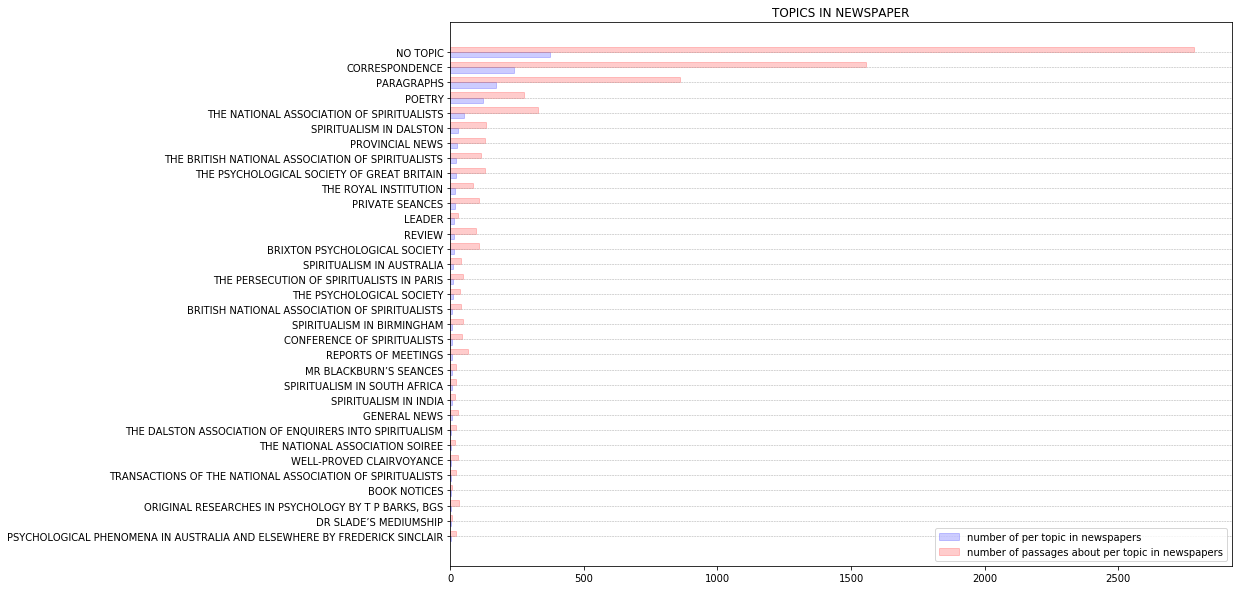

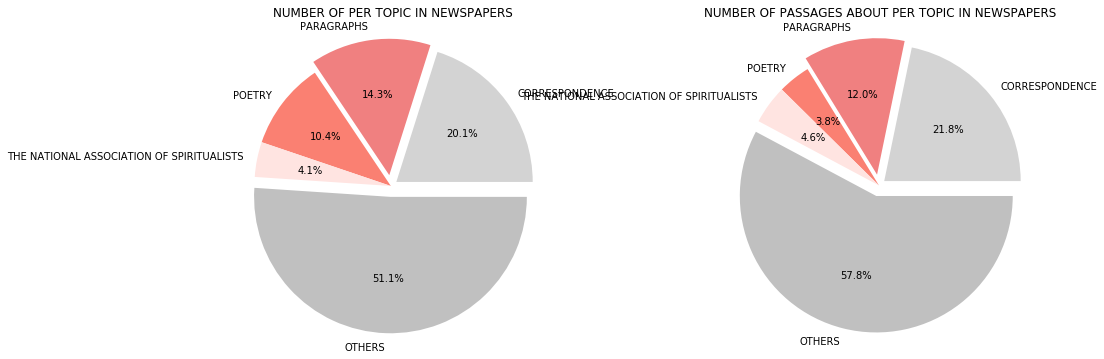


Explore - diagrams 1:

Based on the titles data I gathered in all papers, I programed to count the recurrence of individual topic and the quantity of passages 
about per topic in all newspapers, and then I eliminated the values smaller than 3 which were valueless in the evaluation. Next, I
visualized them and noticed most of topics shared extremely similar rank in two sort ways, so I used pie chart to get the ratio of top
four topics in all newspaper.

1. In the bar chart, I found that topic CORRESPONDENCE, PARAGRAPHS, POETRY and THE NATIONAL ASSOCIATION OF SPIRITUALISTS recurred most 
frequently not only in per newspaper but also in passages, and the ranks of them are similar in two sort ways.

2. In the pie chart, I found the topic CORRESPONDENCE dominated both of newspapers and passages.

3. Some topics like THE NATIONAL ASSOCIATION OF SPIRITUALISTS, not so many newspapers contained them but a lot of passages were about 
them. 




In [2]:
display(count_titles_dataframe)

topic_in_all_series=count_titles_dataframe.loc['num of per topic in all newspapers'].sort_values()
topic_in_all_indexs=list(topic_in_all_series.index)
topic_in_all_values=list(topic_in_all_series)
passages_series=count_titles_dataframe.loc['num of passages about this topic in all newspapers']
passages_indexs=list(passages_series.index)
passages_values=list(passages_series)
passages_indexs_reorder=[]
passages_values_reorder=[]


indexlist=[]
topic_in_all_indexs_originalorder=list(count_titles_dataframe.loc['num of per topic in all newspapers'].index)
for i in topic_in_all_indexs:
    indexlist.append(topic_in_all_indexs_originalorder.index(i))
    
for index in indexlist:
    passages_indexs_reorder.append(passages_indexs[index])
    passages_values_reorder.append(passages_values[index])
    
%matplotlib inline
f, ax = plt.subplots(figsize=(14, 10))
bar_width=0.35
topic_chart = plt.barh(y=range(len(topic_in_all_values)),width=topic_in_all_values,tick_label=topic_in_all_indexs,facecolor='b',edgecolor='b',alpha=0.2,height=bar_width,align='edge',label='number of per topic in newspapers ')
passages_chart = plt.barh(y=np.arange(len(topic_in_all_values))+bar_width,width=passages_values_reorder,tick_label=passages_indexs_reorder,facecolor='r',edgecolor='r',alpha=0.2,height=bar_width,align='edge',label='number of passages about per topic in newspapers')
plt.title("TOPICS IN NEWSPAPER")
plt.legend(loc="lower right")
ax.grid(True, linewidth=0.5, color='#aaaaaa', linestyle='--', axis='y')

plt.show()

fig = plt.subplots(figsize=(16, 6))
plt.subplot(121)
ratios=[topic_in_all_values[-2],topic_in_all_values[-3],topic_in_all_values[-4],topic_in_all_values[-5],np.sum(topic_in_all_values[:-6])+topic_in_all_values[-1]]#存放比例列表
colors=['lightgrey','lightcoral','salmon','mistyrose','silver']
labels=[topic_in_all_indexs[-2],topic_in_all_indexs[-3],topic_in_all_indexs[-4],topic_in_all_indexs[-5],"OTHERS"]
explode=(0.05,0.08,0,0,0.08)
topic_pie=plt.pie(ratios,explode=explode,colors=colors,labels=labels,autopct='%1.1f%%')
plt.title('number of per topic in newspapers'.upper())
plt.axis('equal')

plt.subplot(122)
ratios=[passages_values_reorder[-2],passages_values_reorder[-3],passages_values_reorder[-4],passages_values_reorder[-5],np.sum(passages_values_reorder[:-6])+passages_values_reorder[-1]]#存放比例列表
colors=['lightgrey','lightcoral','salmon','mistyrose','silver']
labels=[passages_indexs_reorder[-2],passages_indexs_reorder[-3],passages_indexs_reorder[-4],passages_indexs_reorder[-5],"OTHERS"]
explode=(0.05,0.08,0,0,0.08)
topic_pie=plt.pie(ratios,explode=explode,colors=colors,labels=labels,autopct='%1.1f%%')
plt.title('number of passages about per topic in newspapers'.upper())
plt.axis('equal')

plt.show()

txt2="""
Explore - diagrams 1:

Based on the titles data I gathered in all papers, I programed to count the recurrence of individual topic and the quantity of passages 
about per topic in all newspapers, and then I eliminated the values smaller than 3 which were valueless in the evaluation. Next, I
visualized them and noticed most of topics shared extremely similar rank in two sort ways, so I used pie chart to get the ratio of top
four topics in all newspaper.

1. In the bar chart, I found that topic CORRESPONDENCE, PARAGRAPHS, POETRY and THE NATIONAL ASSOCIATION OF SPIRITUALISTS recurred most 
frequently not only in per newspaper but also in passages, and the ranks of them are similar in two sort ways.

2. In the pie chart, I found the topic CORRESPONDENCE dominated both of newspapers and passages.

3. Some topics like THE NATIONAL ASSOCIATION OF SPIRITUALISTS, not so many newspapers contained them but a lot of passages were about 
them. 

"""
print(txt2)

,CORRESPONDENCE,PARAGRAPHS,POETRY,THE NATIONAL ASSOCIATION OF SPIRITUALISTS,timeline
"Spiritualist - No.1, November 19th 1869 - P.20",5,5,0,0,November 19th 1869
"Spiritualist - No.2, December 3rd 1869 - P.20",4,10,2,0,December 3rd 1869
"Spiritualist - No.3, December 17th 1869 - P.20",0,4,6,0,December 17th 1869
"Spiritualist - No.4, December 31st 1869 - P.20",2,1,3,0,December 31st 1869
"Spiritualist - No.5, January 14th 1870 - P.20",3,3,1,0,January 14th 1870
...,...,...,...,...,...
"Spiritualist newspaper - No.412, July 16th 1880 - P.20",0,1,1,0,July 16th 1880
"Spiritualist newspaper - No.413, July 23rd 1880 - P.20",0,0,0,0,July 23rd 1880
"Spiritualist newspaper - No.414, July 30th 1880 - P.20",0,0,0,0,July 30th 1880
"Psyche - Volume 21, No.493, March 1882 - K.77.a.7(2)PER",0,0,0,0,March 1882


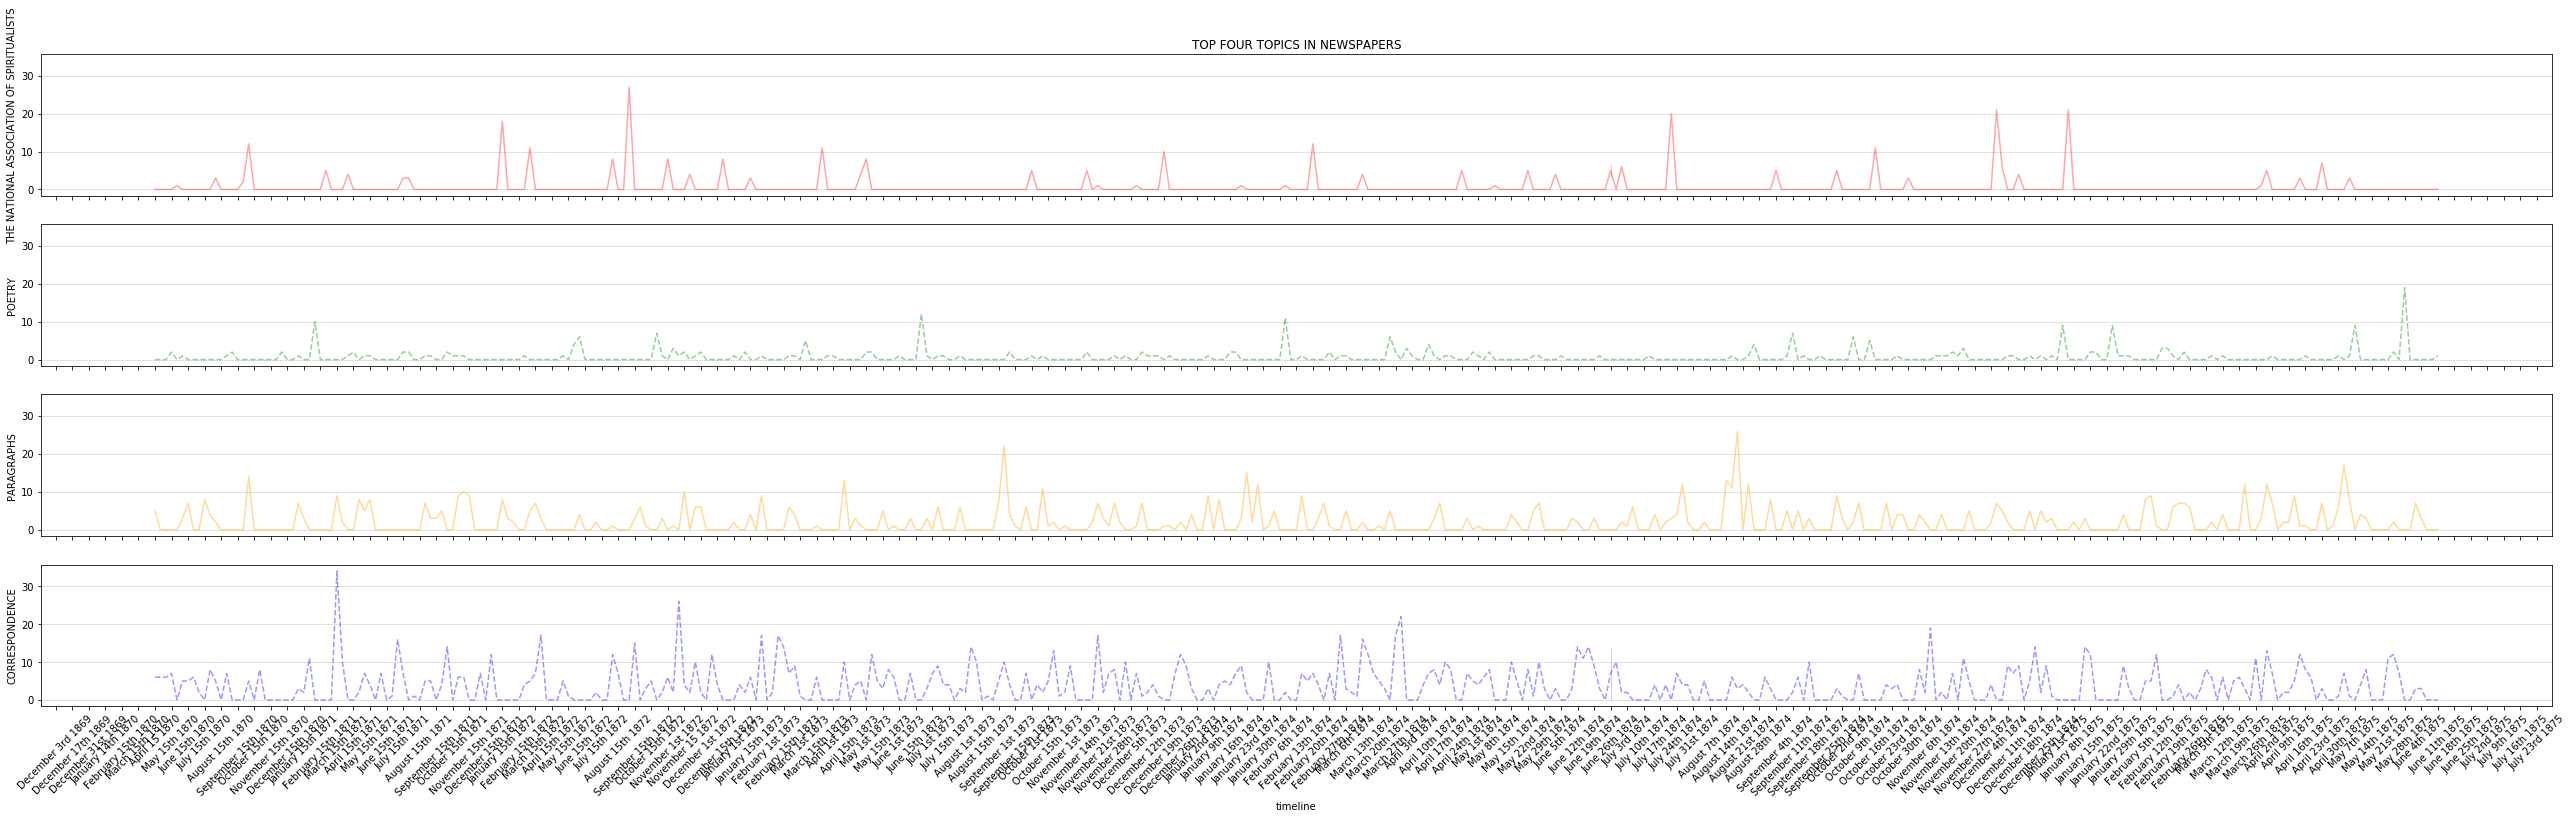


Explore - diagrams 2:

Then I checked the occurrences of top four topics in per newspaper on a timeline. The line chart shows fluctuations of per topic.

1. In THE NATIONAL ASSOCIATION OF SPIRITUALISTS occurrences data,its highest points are really high, but after Feb 1870, it did 
not recur again in any newspaper. The duration of its existence is shortest. On the contrary, its fluctuation is the most violent.

2. As for POETRY,there is an evident uptrend. However, when it reached the peak, at the same time, no passage was about it in the
subsequent newspapers. And the second long duration of existence is the topic PARAGRAPHS, the fluctuation of which is relatively 
stable without significant peaks.

3. Only CORRESPONDENCE exists in all periods of newspapers, and average number of passages about it is high.




In [3]:
def add_topicdata_intodict(topicdatadict,topic,all_file_titledict):
    topicdatadict[topic]=[]
    for file_titledict in all_file_titledict:
        if topic in file_titledict[1].keys():
            topicdatadict[topic].append(len(file_titledict[1][topic]))
        else:
            topicdatadict[topic].append(0)
            
firstfivetopics_dict = {}
add_topicdata_intodict(firstfivetopics_dict,"CORRESPONDENCE",all_file_titledict)
add_topicdata_intodict(firstfivetopics_dict, "PARAGRAPHS", all_file_titledict)
add_topicdata_intodict(firstfivetopics_dict, "POETRY", all_file_titledict)
add_topicdata_intodict(firstfivetopics_dict, "THE NATIONAL ASSOCIATION OF SPIRITUALISTS", all_file_titledict)
data_index=pd.read_csv(filespath+"\\spiritualistNewspaper-inventory.csv")

data_index_list=[str(data_index.columns[1])]+list(data_index[str(data_index.columns[1])])
firstfivetopics_dataframe=pd.DataFrame(data=firstfivetopics_dict,index=data_index_list)

timeline = []
for i in data_index_list[:-2]:
    i=i.split(", ")[1].split(" - ")[0]
    timeline.append(i)
timeline.append(data_index_list[-2].split(" - ")[1].split(", ")[2])
timeline.append(data_index_list[-1].split(" - ")[1].split(", ")[2])

firstfivetopics_dataframe["timeline"]=timeline

display(firstfivetopics_dataframe)

fig, ax = plt.subplots(4,figsize=(45, 12),sharex=True,sharey=True)

ax[0].set_title('top four topics in newspapers'.upper())
sns.lineplot(x="timeline", y="CORRESPONDENCE", data=firstfivetopics_dataframe, color='blue', alpha=0.4, lw=1.5,ax=ax[3])
sns.lineplot(x="timeline", y="PARAGRAPHS", data=firstfivetopics_dataframe, color='orange', alpha=0.4, lw=1.5,ax=ax[2])
sns.lineplot(x="timeline", y="POETRY", data=firstfivetopics_dataframe, color='green', alpha=0.4, lw=1.5,ax=ax[1])
sns.lineplot(x="timeline", y="THE NATIONAL ASSOCIATION OF SPIRITUALISTS", data=firstfivetopics_dataframe, color='red', alpha=0.35, lw=1.5,ax=ax[0])

ax[0].set_xticks([])
#ax.legend(loc=ax_legend)
ax[0].grid(True, linewidth=0.5, color='#aaaaaa', linestyle='--', axis='y')

ax[1].set_xticks([])
ax[1].lines[0].set_linestyle("--")
ax[1].grid(True, linewidth=0.5, color='#aaaaaa', linestyle='--', axis='y')

ax[2].set_xticks([])
ax[2].grid(True, linewidth=0.5, color='#aaaaaa', linestyle='--', axis='y')

#ax[3].set_xticks(ticks=timeline)
ax[3].xaxis.set_major_locator(MultipleLocator(3))
ax[3].set_xticklabels(labels=timeline,rotation=45)
ax[3].lines[0].set_linestyle("--")
ax[3].grid(True, linewidth=0.5, color='#aaaaaa', linestyle='--', axis='y')

plt.show()

txt3="""
Explore - diagrams 2:

Then I checked the occurrences of top four topics in per newspaper on a timeline. The line chart shows fluctuations of per topic.

1. In THE NATIONAL ASSOCIATION OF SPIRITUALISTS occurrences data,its highest points are really high, but after Feb 1870, it did 
not recur again in any newspaper. The duration of its existence is shortest. On the contrary, its fluctuation is the most violent.

2. As for POETRY,there is an evident uptrend. However, when it reached the peak, at the same time, no passage was about it in the
subsequent newspapers. And the second long duration of existence is the topic PARAGRAPHS, the fluctuation of which is relatively 
stable without significant peaks.

3. Only CORRESPONDENCE exists in all periods of newspapers, and average number of passages about it is high.

"""
print(txt3)

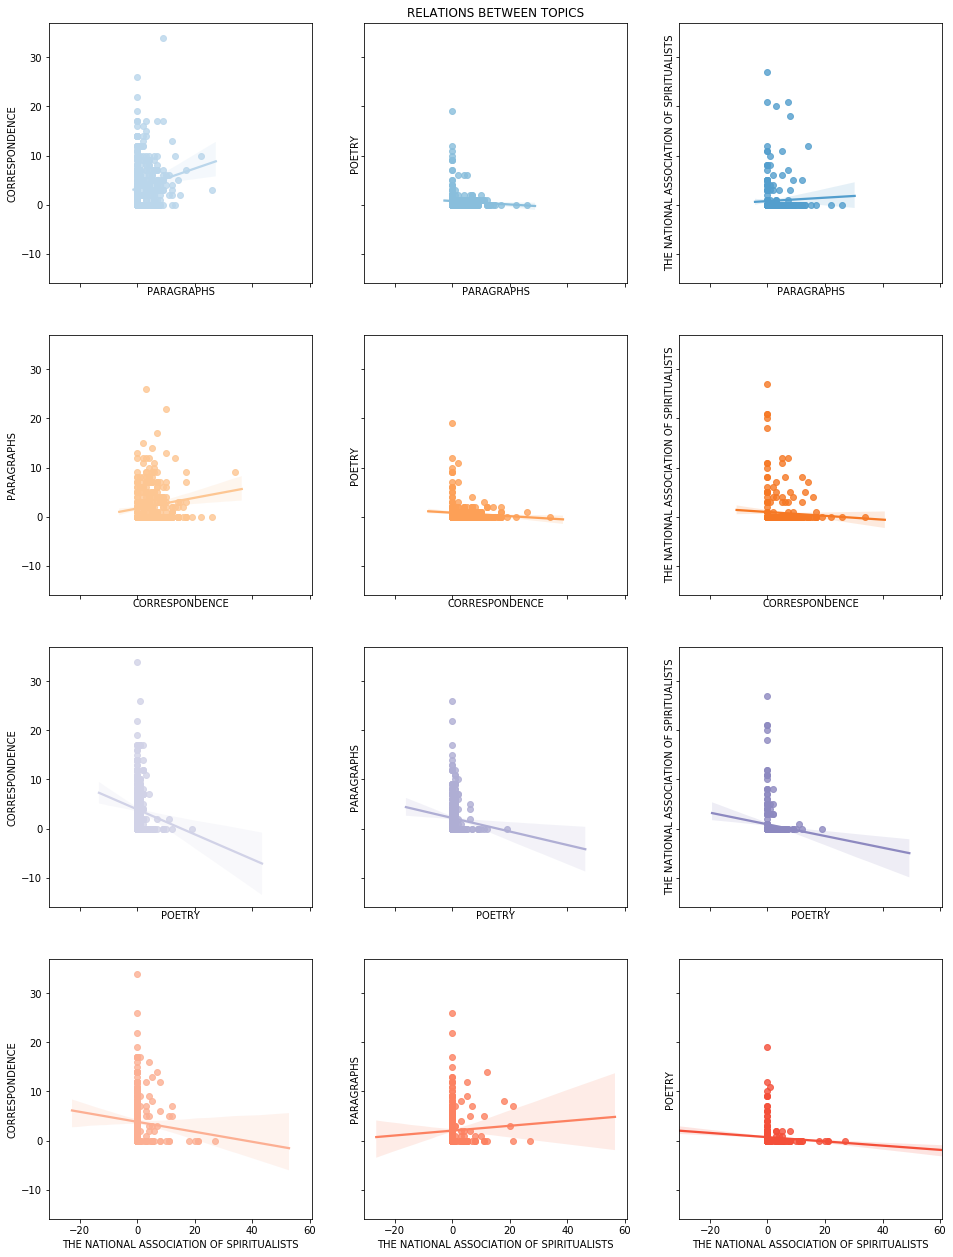


Explore - diagrams 3:

Seeking for some unexpected outcomes, I used regplot to try to find some correlations between top four topics. I speculated some 
topics might tend to occur together.

1. Actually, we can see easily that there are not any relation between most of them, except THE NATIONAL ASSOCIATION OF SPIRITUALISTS 
with PARAGRAPHS.




In [4]:
fig, ax = plt.subplots(4,3,figsize=(16, 22),sharex=True,sharey=True)
Blues=sns.color_palette("Blues")
Reds=sns.color_palette("Reds")
Purples=sns.color_palette("Purples")
Oranges=sns.color_palette("Oranges")
ax[0,1].set_title('relations between topics'.upper())
sns.regplot(x='PARAGRAPHS', y='CORRESPONDENCE', data=firstfivetopics_dataframe,ax=ax[0,0],color=Blues[1])
sns.regplot(x="PARAGRAPHS", y="POETRY", data=firstfivetopics_dataframe,ax=ax[0,1],color=Blues[2])
sns.regplot(x="PARAGRAPHS", y="THE NATIONAL ASSOCIATION OF SPIRITUALISTS", data=firstfivetopics_dataframe,ax=ax[0,2],color=Blues[3])
sns.regplot(x='CORRESPONDENCE', y='PARAGRAPHS', data=firstfivetopics_dataframe,ax=ax[1,0],color=Oranges[1])
sns.regplot(x="CORRESPONDENCE", y="POETRY", data=firstfivetopics_dataframe,ax=ax[1,1],color=Oranges[2])
sns.regplot(x="CORRESPONDENCE", y="THE NATIONAL ASSOCIATION OF SPIRITUALISTS", data=firstfivetopics_dataframe,ax=ax[1,2],color=Oranges[3])
sns.regplot(x='POETRY', y='CORRESPONDENCE', data=firstfivetopics_dataframe,ax=ax[2,0],color=Purples[1])
sns.regplot(x="POETRY", y="PARAGRAPHS", data=firstfivetopics_dataframe,ax=ax[2,1],color=Purples[2])
sns.regplot(x="POETRY", y="THE NATIONAL ASSOCIATION OF SPIRITUALISTS", data=firstfivetopics_dataframe,ax=ax[2,2],color=Purples[3])
sns.regplot(x='THE NATIONAL ASSOCIATION OF SPIRITUALISTS', y='CORRESPONDENCE', data=firstfivetopics_dataframe,ax=ax[3,0],color=Reds[1])
sns.regplot(x="THE NATIONAL ASSOCIATION OF SPIRITUALISTS", y="PARAGRAPHS", data=firstfivetopics_dataframe,ax=ax[3,1],color=Reds[2])
sns.regplot(x="THE NATIONAL ASSOCIATION OF SPIRITUALISTS", y="POETRY", data=firstfivetopics_dataframe,ax=ax[3,2],color=Reds[3])

plt.show()

txt4="""
Explore - diagrams 3:

Seeking for some unexpected outcomes, I used regplot to try to find some correlations between top four topics. I speculated some 
topics might tend to occur together.

1. Actually, we can see easily that there are not any relation between most of them, except THE NATIONAL ASSOCIATION OF SPIRITUALISTS 
with PARAGRAPHS.

"""
print(txt4)


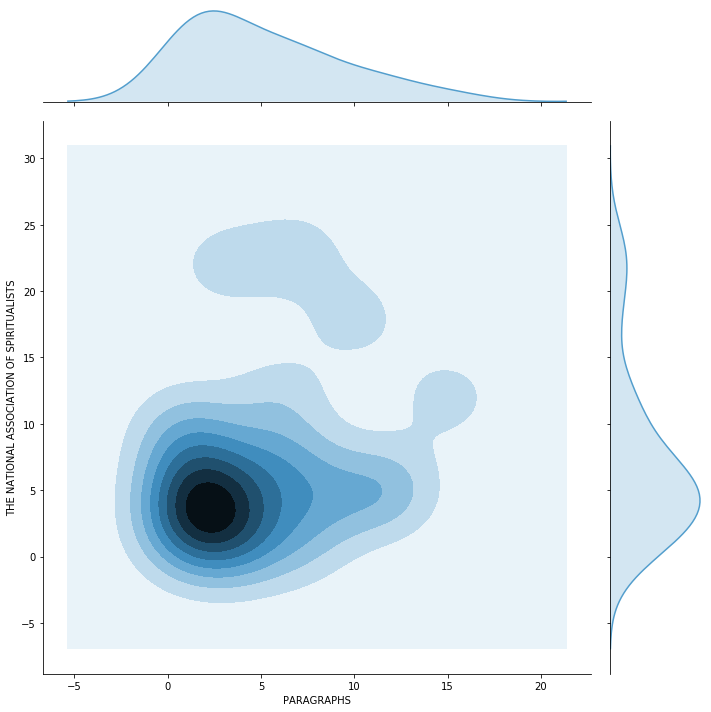


2. In detailed jointplot, we can find THE NATIONAL ASSOCIATION OF SPIRITUALISTS and PARAGRAPHS are in weak direct proportion 
relationship. In other words, they tend to appear together with a similar number of passages.




In [13]:
sns.jointplot(x="PARAGRAPHS", y="THE NATIONAL ASSOCIATION OF SPIRITUALISTS", data=firstfivetopics_dataframe, kind='kde', height=(10),color=Blues[3])
plt.show()

txt5="""
2. In detailed jointplot, we can find THE NATIONAL ASSOCIATION OF SPIRITUALISTS and PARAGRAPHS are in weak direct proportion 
relationship. In other words, they tend to appear together with a similar number of passages.

"""
print(txt5)

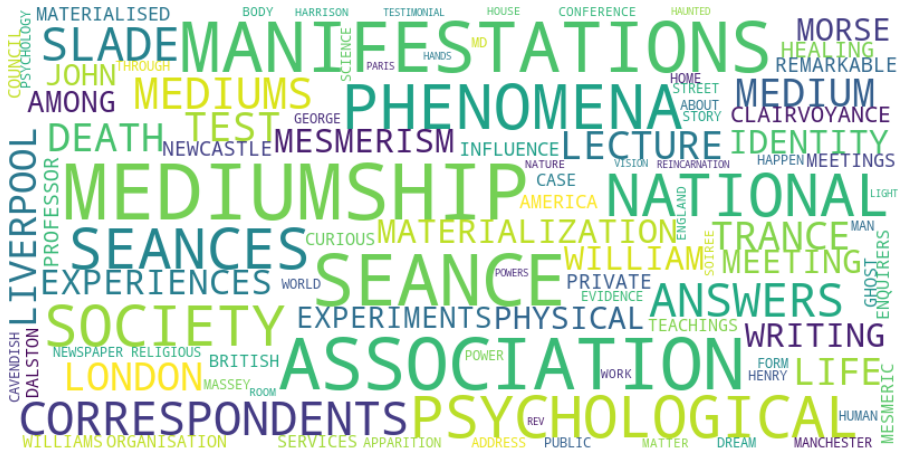

WORD FREQUENCY ABOUT ALL TOPICS IN NEWSPAPERS


,word,frequency
0,MEDIUMSHIP,232
1,SEANCE,190
2,ASSOCIATION,190
3,MANIFESTATIONS,185
4,PHENOMENA,141
5,NATIONAL,128
6,PSYCHOLOGICAL,124
7,SEANCES,122
8,SOCIETY,121
9,CORRESPONDENTS,120



Explore - diagrams 4:

I programed to calculate word frequency from all titles in newspapers, and then I listed them in a table and visualized them with a word
cloud picture.

1. SPIRITUALISM and SPIRIT are mostly used in all titles,because the theme of this newspaper is spiritualism and spiritualists.

2. MR, DR and MRS these words about peopel also repeat really frequently.As I speculate, It is because that there are many passages 
about experience of a person who met a ghost and insights of a person about spirits, which means many passages focus on individual 
experience and thoughts.

3. There are some words like MEDIUMSHIP, SEANCE and MANIFESTATIONS occurred frequently. It is really clear that this newspaper is about 
spiritualists who would like to share their experience about channeling.

4. I noticed ASSOCIATION ranked 7 and NATIONAL ranked 15 in the table, which means at that time spiritualists had an official 
organization, and this association was active and had regular act

In [5]:
def get_wordfrequency_dataframe(all_file_titledict,topic_papernum_dict,datamark='alldata'):
    #all_file_titledict:all_file_titledict[1]
    all_words_in_alltitles=[]
    all_words_in_alltitles_cleaned = []
    DELETEWORDS="UPON OTHER DR MR MRS MISS INTO POETRY PARAGRAPH TWO GONE BETWEEN DE THESE DOWN SPIRITUALISM SPIRIT SPIRITS SPIRITUAL SPIRITUALIST SPIRITUALISTS where what when which who whom whoes why how a an the am is are was were been do does did done has have had can could may might must need ought to dare dared shall should will would before given non and with for new from of in by at on with sunday st every one last so our little no more".upper().split()
    
    if datamark=="alldata":
        for file_titledict in all_file_titledict:
            titledict=file_titledict[1]
            for topic in titledict.keys():
                titles=titledict[topic]
                for title in titles:
                    newtitlelist = divide_word_byalpha(title)
                    for i in newtitlelist:
                        if i.isalpha() and len(i)>1:
                            all_words_in_alltitles.append(i)
    else:
        for file_titledict in all_file_titledict:
            titledict=file_titledict[1]
            if datamark in titledict.keys():
                titles=titledict[datamark]
                for title in titles:
                    newtitlelist = divide_word_byalpha(title)
                    for i in newtitlelist:
                        if i.isalpha() and len(i)>1:
                            all_words_in_alltitles.append(i)
    

    for word in all_words_in_alltitles:
        if word in DELETEWORDS:
            pass
        else:
            all_words_in_alltitles_cleaned.append(word)

    wordfrequency_dict={}
    wordfrequency_dict['word']=[]
    wordfrequency_dict['frequency']=[]
    for word in all_words_in_alltitles_cleaned:
        if word in wordfrequency_dict['word']:
            pass
        else:
            wordfrequency_dict['word'].append(word)
            wordfrequency_dict['frequency'].append(all_words_in_alltitles_cleaned.count(word))
    wordfrequency_dataframe=pd.DataFrame(data=wordfrequency_dict)
    wordfrequency_dataframe.sort_values(by='frequency',ascending=False,inplace=True)
    wordfrequency_dataframe.reset_index(drop=True,inplace=True)
    return wordfrequency_dataframe

def show_wordcloud(wfdataframe):
    words=wfdataframe[:100]['word'].tolist()
    counts=wfdataframe[:100]['frequency'].tolist()
    wfdict={}
    index=0
    for word in words:
        wfdict[word]=counts[index]
        index+=1


    plt.figure(figsize = (16, 16), facecolor = None) 
    wordcloud = WordCloud(max_font_size=70, max_words=100,height=400,width=800,background_color="white").fit_words(wfdict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

wf_inalldata_dataframe=get_wordfrequency_dataframe(all_file_titledict,topic_papernum_dict,"alldata")
show_wordcloud(wf_inalldata_dataframe)
print("word frequency about all topics in newspapers".upper())
display(wf_inalldata_dataframe[:20])

txt6="""
Explore - diagrams 4:

I programed to calculate word frequency from all titles in newspapers, and then I listed them in a table and visualized them with a word
cloud picture.

1. SPIRITUALISM and SPIRIT are mostly used in all titles,because the theme of this newspaper is spiritualism and spiritualists.

2. MR, DR and MRS these words about peopel also repeat really frequently.As I speculate, It is because that there are many passages 
about experience of a person who met a ghost and insights of a person about spirits, which means many passages focus on individual 
experience and thoughts.

3. There are some words like MEDIUMSHIP, SEANCE and MANIFESTATIONS occurred frequently. It is really clear that this newspaper is about 
spiritualists who would like to share their experience about channeling.

4. I noticed ASSOCIATION ranked 7 and NATIONAL ranked 15 in the table, which means at that time spiritualists had an official 
organization, and this association was active and had regular activities.

5. SLADE may be a famous person in this field or a place where a lot of spiritualists activities are held, and I need to do more work to
identify it.
"""
print(txt6)


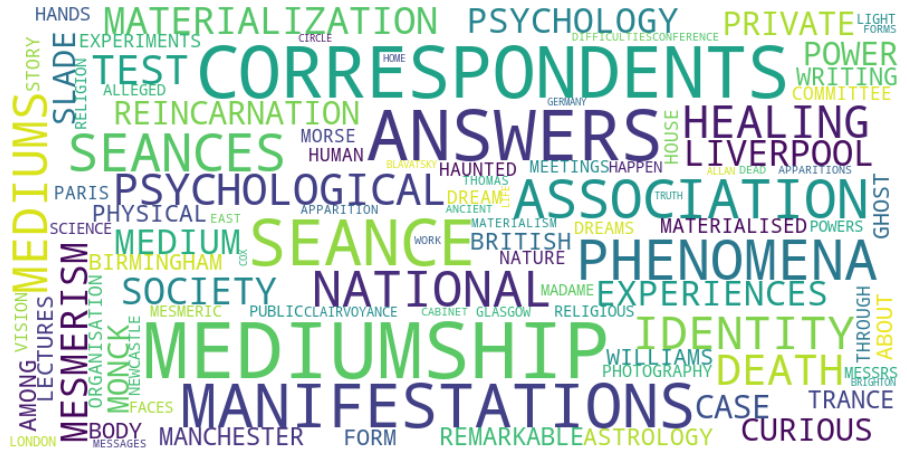

WORD FREQUENCY ABOUT CORRESPONDENCE IN NEWSPAPERS


,word,frequency
0,MEDIUMSHIP,67
1,CORRESPONDENTS,56
2,ANSWERS,55
3,SEANCE,44
4,MANIFESTATIONS,42
5,PHENOMENA,35
6,ASSOCIATION,34
7,SEANCES,31
8,NATIONAL,29
9,MEDIUMS,26



Explore - diagrams 4:

This part is about word frequency from CORRESPONDENCE in newspapers, and I processed it in the same way.

1. ANSWERS is frequently used in titles,I guess there was an academic authority who regularly answered the questions from others.

2. In the table, HEALING is in the last but one counted 24, which may mean restoring to health from exorcism or hauntings.



In [6]:
wf_CORRESPONDENCE_dataframe=get_wordfrequency_dataframe(all_file_titledict,topic_papernum_dict,"CORRESPONDENCE")
show_wordcloud(wf_CORRESPONDENCE_dataframe)
print("word frequency about CORRESPONDENCE in newspapers".upper())
display(wf_CORRESPONDENCE_dataframe[:20])

txt7="""
Explore - diagrams 4:

This part is about word frequency from CORRESPONDENCE in newspapers, and I processed it in the same way.

1. ANSWERS is frequently used in titles,I guess there was an academic authority who regularly answered the questions from others.

2. In the table, HEALING is in the last but one counted 24, which may mean restoring to health from exorcism or hauntings.
"""
print(txt7)

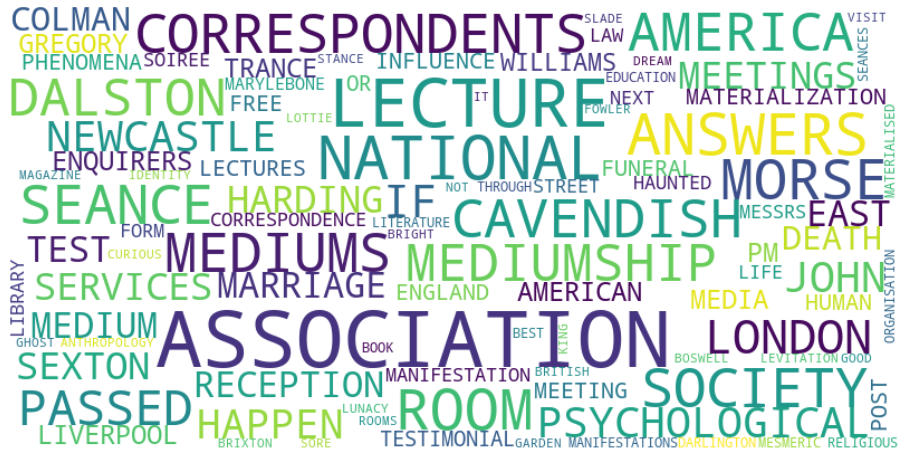

WORD FREQUENCY ABOUT PARAGRAPHS IN NEWSPAPERS


,word,frequency
0,ASSOCIATION,40
1,LECTURE,28
2,NATIONAL,22
3,ANSWERS,20
4,ROOM,19
5,MORSE,18
6,CORRESPONDENTS,17
7,SOCIETY,17
8,SEANCE,17
9,MEDIUMS,17



Explore - diagrams 4:

This part is about word frequency from PARAGRAPHS in newspapers, and I processed it in the same way.

1. A location DALSTON repeat multiple times in titles,I thought it was a significant place for spiritualists.

2. There are some words like LECTURE and ROOM occurred frequently. It is really clear that there were some courses which could teach
spiritualists about theory and application about spiritualism and mediumship.

3. because hauntings always happen in evening, EVENING is mentioned a lot of times in titles. 

4. LONDON is also on the list, I thought it was because that this newspaper focused on LONDON.

5. CAVENDISH and MORSE are names.



In [7]:
wf_PARAGRAPHS_dataframe=get_wordfrequency_dataframe(all_file_titledict,topic_papernum_dict,"PARAGRAPHS")
show_wordcloud(wf_PARAGRAPHS_dataframe)
print("word frequency about PARAGRAPHS in newspapers".upper())
display(wf_PARAGRAPHS_dataframe[:20])

txt8="""
Explore - diagrams 4:

This part is about word frequency from PARAGRAPHS in newspapers, and I processed it in the same way.

1. A location DALSTON repeat multiple times in titles,I thought it was a significant place for spiritualists.

2. There are some words like LECTURE and ROOM occurred frequently. It is really clear that there were some courses which could teach
spiritualists about theory and application about spiritualism and mediumship.

3. because hauntings always happen in evening, EVENING is mentioned a lot of times in titles. 

4. LONDON is also on the list, I thought it was because that this newspaper focused on LONDON.

5. CAVENDISH and MORSE are names.
"""
print(txt8)

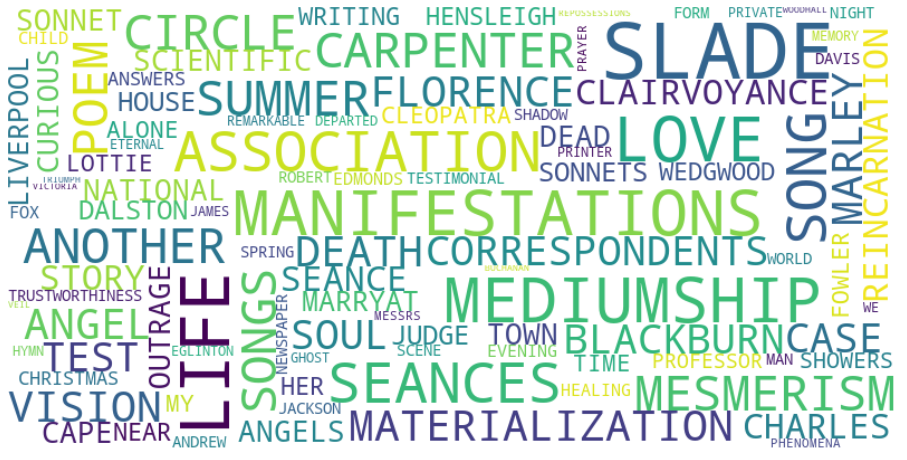

WORD FREQUENCY ABOUT POETRY IN NEWSPAPERS


,word,frequency
0,SLADE,8
1,LIFE,6
2,MANIFESTATIONS,5
3,LOVE,5
4,MEDIUMSHIP,5
5,SEANCES,4
6,ASSOCIATION,4
7,SONG,4
8,MESMERISM,3
9,SONGS,3



Explore - diagrams 4:

This part is about word frequency from POETRY in newspapers, and I processed it in the same way.

1. LIFE, MISS, LOVE and SONG repeat multiple times in titles,I thought it was because this topic was about poems.

2. REINCARNATION recurs a lot times, this is an uncommon word. Later I may explore more in context about it.



In [8]:
wf_POETRY_dataframe=get_wordfrequency_dataframe(all_file_titledict,topic_papernum_dict,"POETRY")
show_wordcloud(wf_POETRY_dataframe)
print("word frequency about POETRY in newspapers".upper())
display(wf_POETRY_dataframe[:20])

txt9="""
Explore - diagrams 4:

This part is about word frequency from POETRY in newspapers, and I processed it in the same way.

1. LIFE, MISS, LOVE and SONG repeat multiple times in titles,I thought it was because this topic was about poems.

2. REINCARNATION recurs a lot times, this is an uncommon word. Later I may explore more in context about it.
"""
print(txt9)

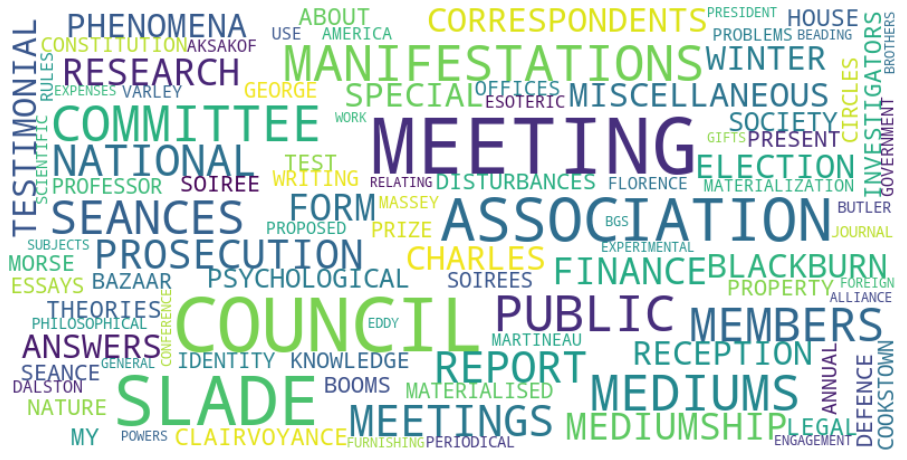

WORD FREQUENCY ABOUT THE NATIONAL ASSOCIATION OF SPIRITUALISTS IN NEWSPAPERS


,word,frequency
0,MEETING,23
1,COUNCIL,21
2,SLADE,18
3,ASSOCIATION,13
4,PUBLIC,9
5,MANIFESTATIONS,9
6,COMMITTEE,9
7,MEDIUMS,9
8,SEANCES,8
9,MEMBERS,8



Explore - diagrams 4:

This part is about word frequency from THE NATIONAL ASSOCIATION OF SPIRITUALISTS in newspapers, and I processed it in the same way.

1. COUNCIL, ASSOCIATION, NATIONAL, COMMITTEE, MEMBERS, REPORT and MEETINGS repeat frequently,and all of them are relevant to this
topic THE NATIONAL ASSOCIATION OF SPIRITUALISTS.




In [9]:
wf_ASSOCIATION_dataframe=get_wordfrequency_dataframe(all_file_titledict,topic_papernum_dict,"THE NATIONAL ASSOCIATION OF SPIRITUALISTS")
show_wordcloud(wf_ASSOCIATION_dataframe)
print("word frequency about THE NATIONAL ASSOCIATION OF SPIRITUALISTS in newspapers".upper())
display(wf_ASSOCIATION_dataframe[:20])

txt10="""
Explore - diagrams 4:

This part is about word frequency from THE NATIONAL ASSOCIATION OF SPIRITUALISTS in newspapers, and I processed it in the same way.

1. COUNCIL, ASSOCIATION, NATIONAL, COMMITTEE, MEMBERS, REPORT and MEETINGS repeat frequently,and all of them are relevant to this
topic THE NATIONAL ASSOCIATION OF SPIRITUALISTS.

"""
print(txt10)

In [20]:
txt11="""
Reflect and Hypothesise:

This data is about spiritualists and spiritualism. I put a lot of effort into capturing useful information, as it was unclean and 
inaccessible than I expected. I used python to catch titles information on my observation of newspaper layout which changed several 
times, and then I set a dict to contain all the data and correct the spelling of titles. This is the part of program.

And as for data itself, I think it is interesting. By analyzing the dataset, I found just like other journals, there was no central 
structure or key texts in this newspaper, which was divided into different topics. I think there were a lot of potential correlations 
between topics, word frequency, changes on timeline, places and names. I had some hypotheses of them and I would like to discuss them 
below.

In general, I enjoyed exploring the data, but I also had a major difficulty. The first one is that my titles collector may collect 
incorrect information. Basically, my titles collection is based on the significant signs about titles in the paragraphs, but sometimes 
OCR did not transfer significant signs. It made the incompletion of key information, which caused difficulties in my orientation of 
titles. 

1.The changes of top 4 topics reflect the major interests of spiritualists and bias from public against spiritualism for different 
period. 

Reason: 
In diagrams 2, we can find that some topics recurred in a period and reached its highest point, but after that, it did not occur again.
As I speculated, topics are linked to the changes of newspaper layout, focus of readers and views of public, so I thought there must 
be some relations between them. 

2.There was a bias that females paid more attention to spiritualism than males, and also there was a bias about the correlation between 
level of education and spiritualists.

Reason:
In diagrams 4, we can notice that MR ranks higher than MRS in titles of four different topics, and DR appears in all rank list of 
topics. I thought males also had a passionate interest in spiritualism and dominated spiritualism field just like a lot of other fields,
and higher educated people called the tune in this field too.

3.There was a rise and decline about spiritualism during the time. 

Reason:
In diagrams 2, we can find that the topic THE NATIONAL ASSOCIATION OF SPIRITUALISTS occurrences data, its highest points are really high,
but after Feb 1870, it did not appear in any passages. And in diagrams 4, we can find word like COUNCIL, ASSOCIATION, NATIONAL, 
COMMITTEE, MEMBERS, REPORT and MEETINGS repeat frequently,and all of them are relevant to this topic THE NATIONAL ASSOCIATION OF 
SPIRITUALISTS.

Method of testing:
I would like to ask data holder for some information, and find the key points about topics in data (highest point, abnormal values, 
average numbers, disappearing date ), and then I will do some readings about that period and linked them with the big events at that
time. Next, I will improve my titles collector and explore the relations with Spacy in python.
"""
print(txt11)


Reflect and Hypothesise:

This data is about spiritualists and spiritualism. I put a lot of effort into capturing useful information, as it was unclean and 
inaccessible than I expected. I used python to catch titles information on my observation of newspaper layout which changed several 
times, and then I set a dict to contain all the data and correct the spelling of titles. This is the part of program.

And as for data itself, I think it is interesting. By analyzing the dataset, I found just like other journals, there was no central 
structure or key texts in this newspaper, which was divided into different topics. I think there were a lot of potential correlations 
between topics, word frequency, changes on timeline, places and names. I had some hypotheses of them and I would like to discuss them 
below.

In general, I enjoyed exploring the data, but I also had a major difficulty. The first one is that my titles collector may collect 
incorrect information. Basically, my titles col